<a href="https://colab.research.google.com/github/FaizaAli-DS/ResumeWise_Capstone_Project-NLP-ML/blob/all-about-AI-and-Data-Science/My_HunarWise_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Resume_DataSet.csv', encoding='utf-8')

# Analyze the data

In [4]:
df['cleaned_resume'] = ''
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
df.tail()

,Category,Resume,cleaned_resume
429,Testing,â¢ Good logical and analytical skills â¢ Pos...,
430,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...,
431,Testing,Computer Skills: â¢ Proficient in MS office (...,
432,Testing,â Willingness to accept the challenges. â ...,
433,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",


In [6]:
df.info

<bound method DataFrame.info of          Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
429       Testing  â¢ Good logical and analytical skills â¢ Pos...   
430       Testing  COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...   
431       Testing  Computer Skills: â¢ Proficient in MS office (...   
432       Testing  â Willingness to accept the challenges. â ...   
433       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   

    cleaned_resume  
0                   
1                   
2                   
3                  

In [7]:
df.shape

(434, 3)

In [8]:
df.size

1302

# Summarize the Data

In [9]:
df.describe()

,Category,Resume,cleaned_resume
count,434,434,434
unique,12,88,1
top,Data Science,"Technical Skills Web Technologies: Angular JS,...",
freq,40,16,434


In [10]:
df.nunique()

Category          12
Resume            88
cleaned_resume     1
dtype: int64

In [11]:
df.isnull()

,Category,Resume,cleaned_resume
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
429,False,False,False
430,False,False,False
431,False,False,False
432,False,False,False


In [12]:
df.isnull().sum()

Category          0
Resume            0
cleaned_resume    0
dtype: int64

# Visualise the null values

<Axes: >

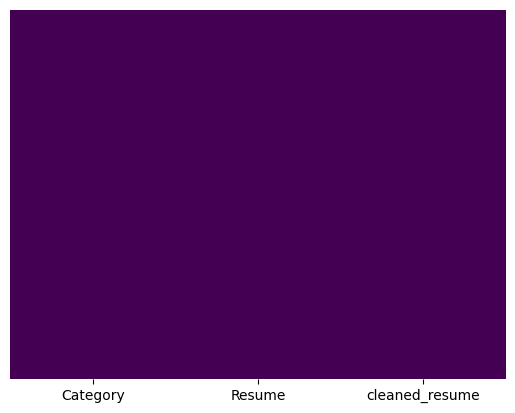

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

# Exploring Categories

In [14]:
df['Category'].unique()

array(['Data Science', 'Web Designing', 'Java Developer',
       'Business Analyst', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'Database', 'Hadoop',
       'DotNet Developer', 'Blockchain', 'Testing'], dtype=object)

In [15]:
df['Category'].value_counts()

Data Science                 40
Web Designing                40
Java Developer               40
Python Developer             40
DevOps Engineer              40
Hadoop                       40
Blockchain                   40
Testing                      40
Database                     33
Business Analyst             28
DotNet Developer             28
Network Security Engineer    25
Name: Category, dtype: int64

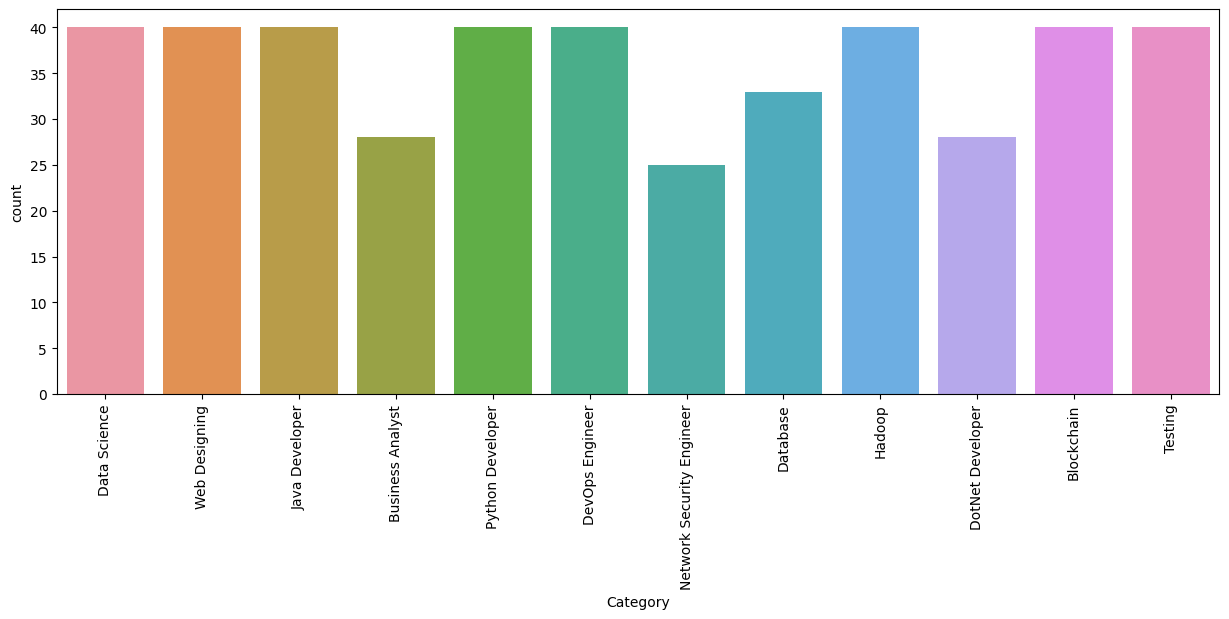

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()
plt.savefig('jobcategory_details.png')

There are 25 different categories we have in the data.
Instead of the count or frequency, we can also visualize the distribution of job categories in percentage as below:

In [17]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame containing the data

# Pie-chart
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels = df['Category'].value_counts().reset_index()['index']

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({'Category': targetLabels, 'Count': targetCounts})

# Create an interactive pie chart with Plotly
fig = px.pie(pie_data, names='Category', values='Count', title='DOMAIN CATEGORY DISTRIBUTION')

# Increase the size of the figure
fig.update_layout(width=1200, height=800)

# Show the figure
fig.show()


In [18]:
!pip install wordcloud

In [19]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 800), ('months', 702), ('1', 511), ('Details', 509), ('company', 440), ('description', 415), ('year', 342), ('Project', 332), ('Less', 328), ('Java', 297), ('Maharashtra', 264), ('data', 249), ('project', 237), ('Data', 235), ('Python', 224), ('application', 223), ('6', 220), ('January', 220), ('Developer', 219), ('Web', 207), ('Technologies', 197), ('Software', 182), ('using', 179), ('business', 177), ('Business', 166), ('team', 164), ('SQL', 161), ('C', 161), ('Skill', 160), ('The', 154), ('user', 153), ('requirements', 152), ('Education', 150), ('Pune', 150), ('various', 146), ('Description', 145), ('Science', 144), ('Used', 141), ('Pvt', 135), ('Database', 134), ('System', 134), ('HTML', 133), ('monthsCompany', 133), ('Ltd', 133), ('2', 130), ('Management', 128), ('Engineering', 126), ('Test', 126), ('24', 125), ('A', 125)]


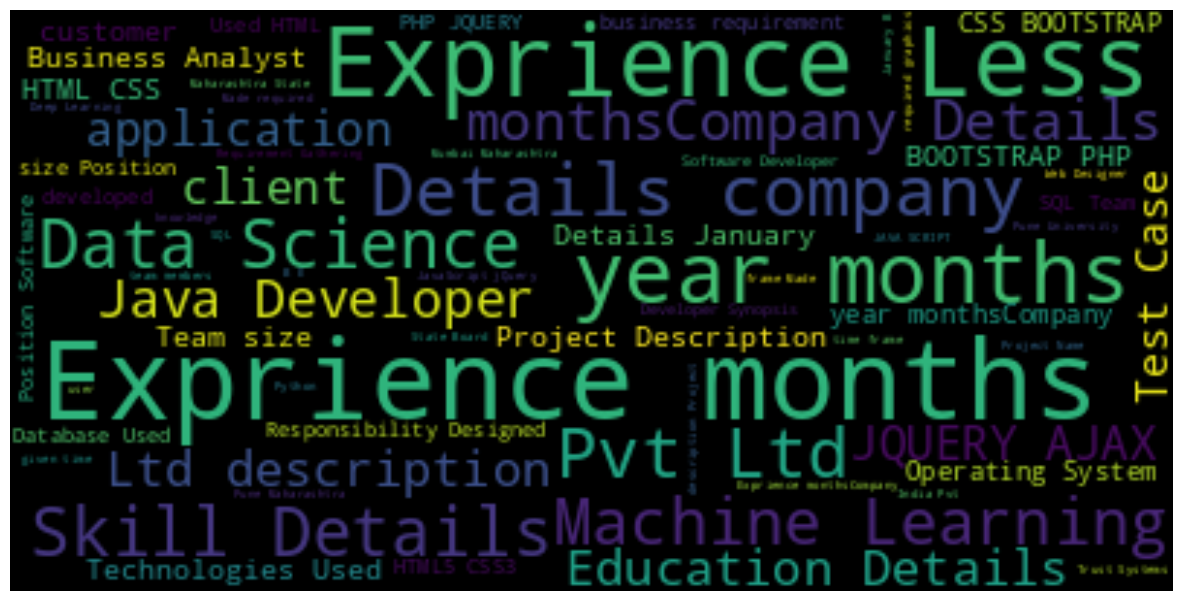

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploring Resume

In [21]:
df['Category'][0]

'Data Science'

In [22]:
df['cleaned_resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [23]:
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
429,Testing,â¢ Good logical and analytical skills â¢ Pos...,Good logical and analytical skills Positive a...
430,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...,COMPUTER PROFICIENCY Basic MS Office PowerPoin...
431,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
432,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...


# Data Wrangling / Cleaning Data                                  
1 URLs,                                                
2 Hashtags,                                             
3 Mentions,                                           
4 Special letters,                                     
5 Punctuations                                            

In [24]:
df.shape

(434, 3)

Now, we get the entire “Cleaned_Resume” as a single text.

In [25]:
cleanResume("my #### $ #  #Faizaali webiste like is this http://github.com/FaizaAli-DS and access it faizaali.ds@gmain.com")

'my webiste like is this and a ess it faizaali ds '

In [26]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [27]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Words into categorical values

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [30]:
df.Category.unique()

array([ 2, 11,  7,  1,  9,  4,  8,  3,  6,  5,  0, 10])

# Vectorization

In [31]:
from scipy.sparse import hstack

requiredText =df['cleaned_resume'].values
requiredTarget = df['Category'].values

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


# Splitting

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)

In [34]:
print(X_train.shape)
print(X_test.shape)

(347, 1500)
(87, 1500)


### Now let’s train the model and print the classification report:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         4
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00        10

    accuracy                           0.99        87
   macro avg       0.99      0.99      0

In [36]:
prediction = clf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix for training set
confusion_matrix_train = confusion_matrix(y_train, clf.predict(X_train))
print("Confusion matrix for training set:")
print(confusion_matrix_train)

# Create confusion matrix for test set
confusion_matrix_test = confusion_matrix(y_test, prediction)
print("Confusion matrix for test set:")
print(confusion_matrix_test)

Confusion matrix for training set:
[[28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30]]
Confusion matrix for test set:
[[12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 1

In [38]:
# Create a dictionary to map category IDs to category names
category_mapping = {
    2: "Data Science",
    11: "Business Analyst",
    7: "Web Designing",
    1: "Database",
    9: "DevOps Engineer",
    4: "DotNet Developer",
    8: "Hadoop",
    3: "Java Developer",
    6: "Network Security Engineer",
    5: "Python Developer",
    0: "Testing",
    10: "Blockchain"
}

In [43]:
# Test the classifier on individual resumes
resume_1 = "I am a data scientist with experience in machine learning and natural language processing."
resume_2 = "I am a web developer with experience in front-end and back-end development."
resume_3 = "ABOUT ME I specialize in creating and deploying AI models and solving complex data challenges using NLP, deep learning and ML models. I am committed to continuous learning, actively seeking opportunities to apply my skills in real-world projects. "

In [44]:
resume_1_tfidf = word_vectorizer.transform([resume_1])
resume_2_tfidf = word_vectorizer.transform([resume_2])
resume_3_tfidf = word_vectorizer.transform([resume_3])

prediction_1 = clf.predict(resume_1_tfidf)[0]
prediction_2 = clf.predict(resume_2_tfidf)[0]
prediction_3 = clf.predict(resume_3_tfidf)[0]

# Retrieve the corresponding category names from the dictionary
predicted_category_1 = category_mapping[prediction_1]
predicted_category_2 = category_mapping[prediction_2]
predicted_category_3 = category_mapping[prediction_3]

In [45]:
# Print the predictions and their corresponding category names
print("Predicted category for resume 1:", predicted_category_1)
print("Predicted category for resume 2:", predicted_category_2)
print("Predicted category for resume 3:", predicted_category_3)

Predicted category for resume 1: Data Science
Predicted category for resume 2: Web Designing
Predicted category for resume 3: Data Science
